# Business case of Yulu 

Problem Statement : Yulu, India's leading micro-mobility service provider, has seen significant revenue dips and wants to understand the factors influencing demand for shared electric cycles in the Indian market.
Exploratory Data Analysis (EDA):
1.	Dataset Exploration:
•	Import the dataset and examine its structure.
•	Check for missing values, data types, and basic statistics.
•	Understand the distribution of each variable.
2.	Relationship between Variables:
•	Investigate relationships between the dependent variable (Count of rental bikes) and independent variables (Workingday, Weather, Season, etc.).
•	Visualize relationships using scatter plots, box plots, or correlation matrices.
3.	Statistical Tests:
•	Determine the significance of variables in predicting electric cycle demand.
•	Perform 2-sample t-tests to compare rental counts on working days vs. non-working days.
•	Use ANOVA to assess differences in rental counts across different seasons and weather conditions.
•	Consider chi-square tests to examine relationships between weather and season.
4.	Hypothesis Testing:
•	Set up null hypotheses (H0) and alternative hypotheses (H1) for each test.
•	Check assumptions of normality and equal variance using visualizations and statistical tests.
•	Define a significance level (alpha) for hypothesis testing.
5.	Test Statistics and Decision Making:
•	Calculate test statistics for each hypothesis test.
•	Based on the calculated p-values, make decisions to accept or reject the null hypotheses.
6.	Inference:
•	Interpret the results of hypothesis tests and statistical analyses.
•	Provide insights into the significant factors influencing electric cycle demand in the Indian market.
•	Make recommendations based on the findings to improve Yulu's business strategy and revenue performance.
By performing thorough exploratory data analysis and hypothesis testing, we aim to identify key factors driving demand for shared electric cycles and provide actionable insights for Yulu to enhance its business operations and address revenue challenges.




## Importing dataset and libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("bike_sharing.csv")

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [5]:
df.shape

(10886, 12)

In [6]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [7]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['datetime'].min(),df['datetime'].max()

(Timestamp('2011-01-01 00:00:00'), Timestamp('2012-12-19 23:00:00'))

In [8]:
df['date'] = df['datetime'].dt.date

In [9]:
df.groupby('date')['count'].sum().sort_values(ascending=False)

date
2012-09-15    8714
2012-05-19    8294
2012-09-09    8227
2012-10-05    8156
2012-06-02    8120
              ... 
2011-04-16     795
2011-12-07     705
2011-01-18     683
2011-03-10     623
2011-03-06     605
Name: count, Length: 456, dtype: int64

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='date'>

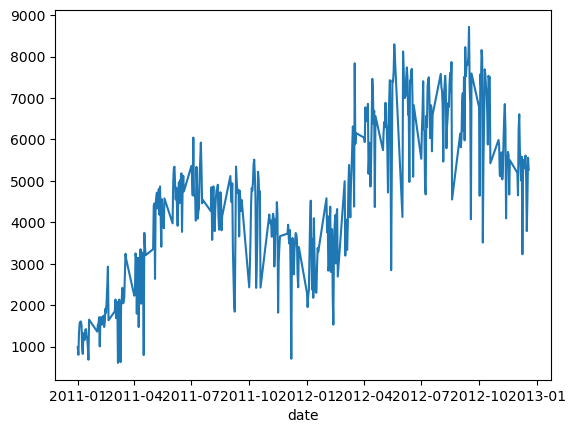

In [11]:
df.groupby('date')['count'].sum().plot(kind='line')

<AxesSubplot:xlabel='humidity', ylabel='Count'>

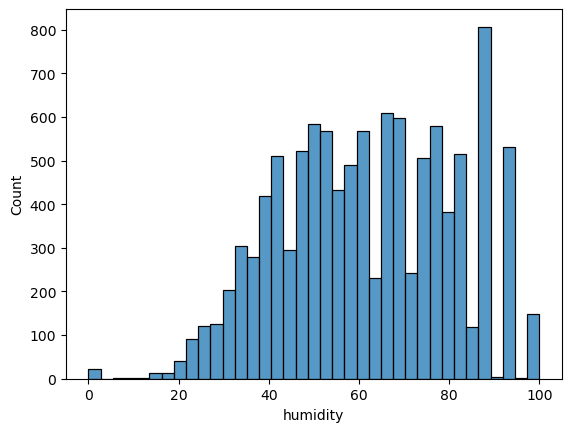

In [12]:
sns.histplot(df['humidity'])

D:\program\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='count'>

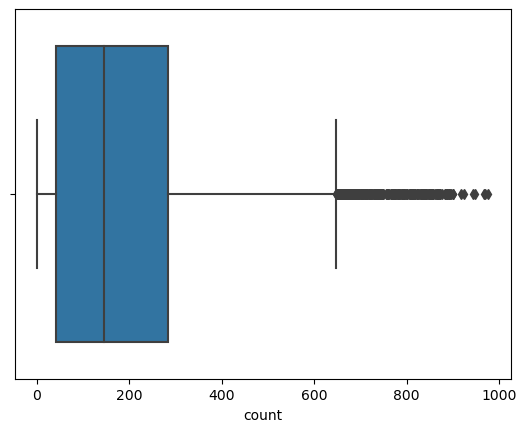

In [13]:
sns.boxplot(df['count'])

<AxesSubplot:xlabel='windspeed', ylabel='Count'>

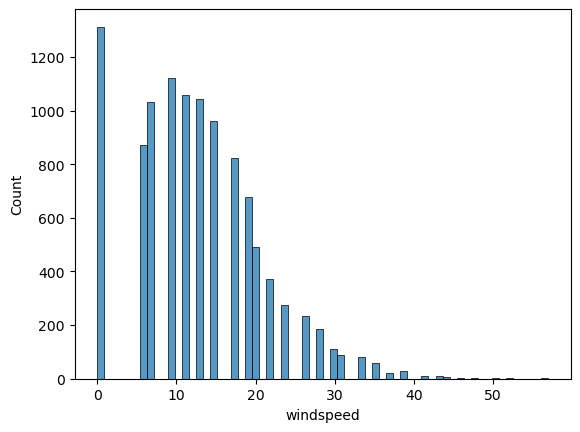

In [14]:
sns.histplot(df['windspeed'])

D:\program\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='season', ylabel='count'>

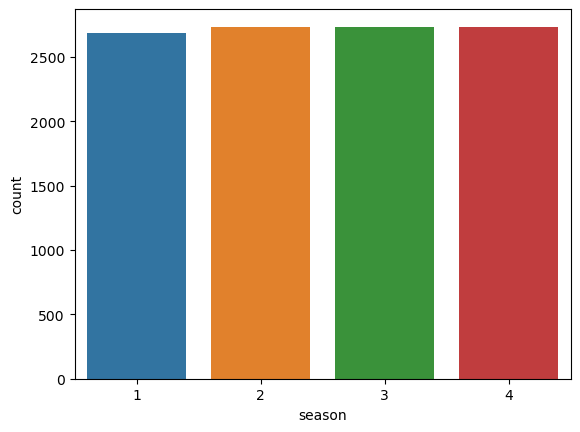

In [15]:
sns.countplot(df['season'])

D:\program\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='workingday', ylabel='count'>

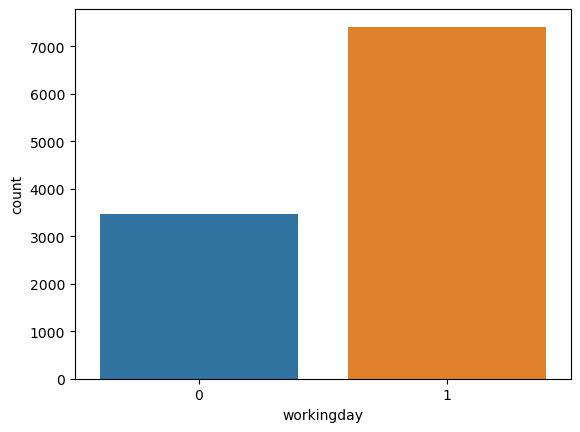

In [16]:
sns.countplot(df['workingday'])

D:\program\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='holiday', ylabel='count'>

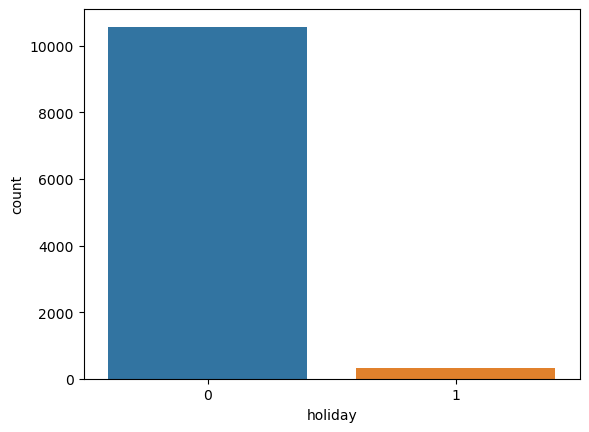

In [17]:
sns.countplot(df['holiday'])

D:\program\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weather', ylabel='count'>

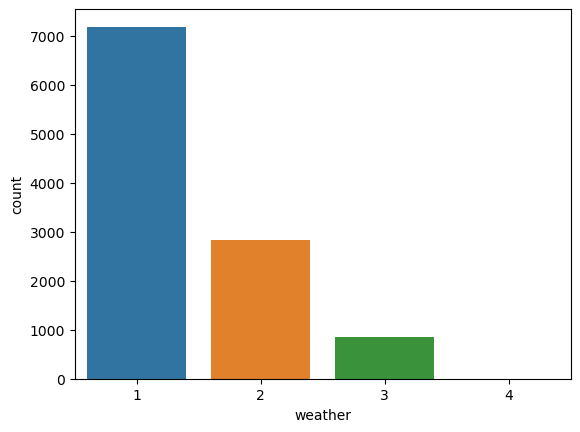

In [18]:
sns.countplot(df['weather'])

<AxesSubplot:xlabel='atemp', ylabel='Count'>

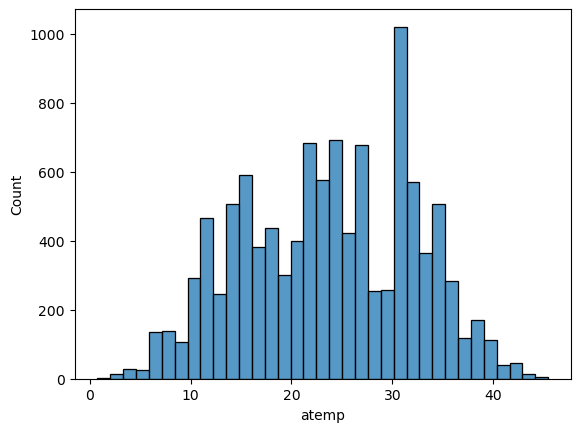

In [19]:
sns.histplot(df['atemp'])

In [20]:
#fetching data on the basis of working day, season, weather and holiday to perform different analysis on that

In [21]:
#separating data on the basis of working day
w_day = df[df['workingday']==1] #dataset of working day
nw_day = df[df['workingday']==0] #dataset of non working day

In [22]:
#separating data on the basis of season
spring = df[df['season']==1] #data for spring season
summer = df[df['season']==2] #data for summer season
fall = df[df['season']==3] #data for Autumn season
winter = df[df['season']==4] #data for winter season


In [23]:
#separating data on the basis of holiday
holiday = df[df['holiday']==1] #data when there is a holiday
not_holiday = df[df['holiday']==0] #data when there is not a holiday

In [24]:
#separating data on the basis of weather
clear = df[df['weather']==1] # when weather is clear
mist = df[df['weather']==2] #when weather is cloudy
light_rain = df[df['weather']==3] # when there is light rain
heavy_rain = df[df['weather']==4] # when there is heavy rain


Text(0.5, 1.0, 'non working day')

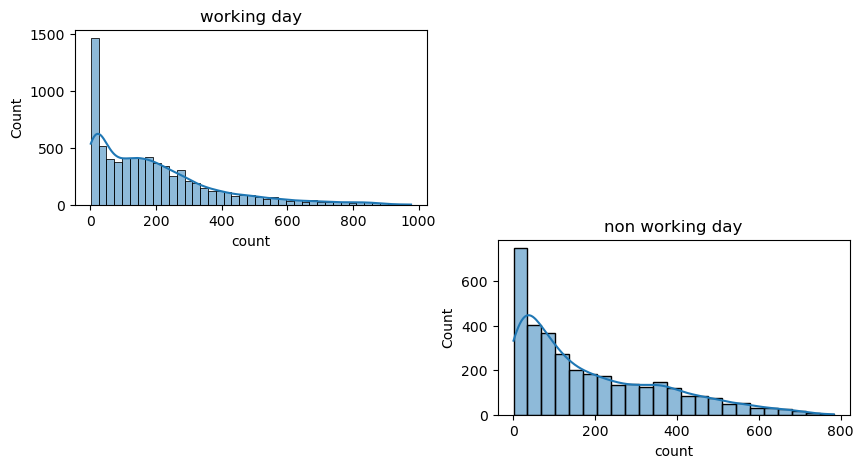

In [25]:
fig = plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.histplot(data=w_day,x='count' , kde=True).set_title("working day") #kde plot to check distribution of booking on working days
plt.subplot(2,2,4)
sns.histplot(data=nw_day,x='count' , kde=True).set_title("non working day") #kde plot to check distribution of booking on non working days

Text(0.5, 1.0, 'bookings on not holiday')

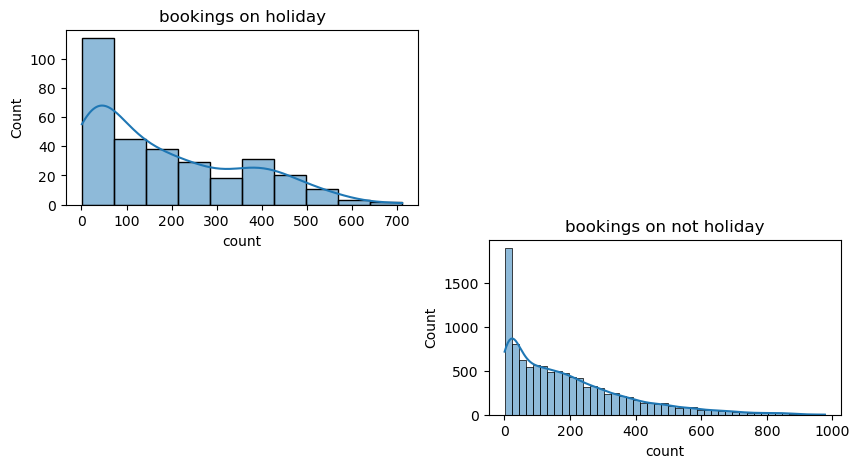

In [26]:
fig = plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.histplot(data=holiday,x='count' , kde=True).set_title("bookings on holiday") #kde plot to check if data is normally distributed for booking on holiday
plt.subplot(2,2,4)
sns.histplot(data=not_holiday,x='count' , kde=True).set_title("bookings on not holiday") #kde plot to check if data is normally distributed for booking on not holiday

Text(0.5, 1.0, 'winter')

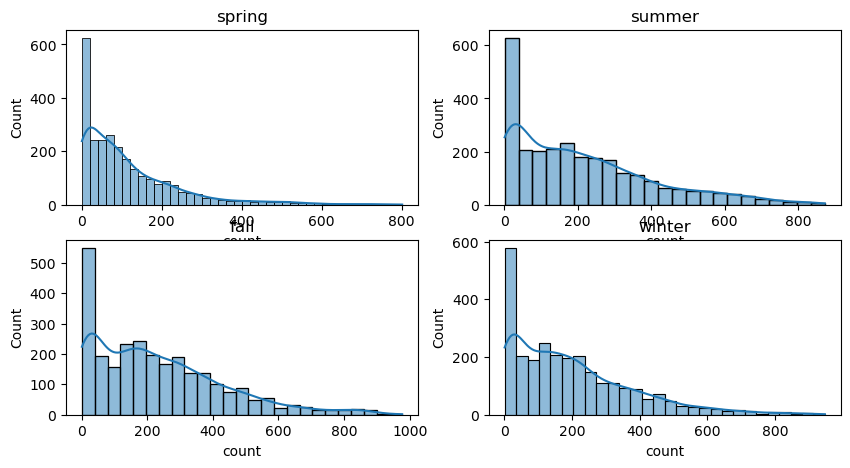

In [27]:
fig = plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.histplot(data=spring,x='count' , kde=True).set_title("spring") #to check visually type of distribution of bookings in spring season using kde plot 
plt.subplot(2,2,2)
sns.histplot(data=summer,x='count' , kde=True).set_title("summer") #to check visually type of distribution of bookings in summer season using kde plot 
plt.subplot(2,2,3)
sns.histplot(data=fall,x='count' , kde=True).set_title("fall") #to check visually type of distribution of bookings in fall season using kde plot
plt.subplot(2,2,4)
sns.histplot(data=winter,x='count' , kde=True).set_title("winter") #to check visually type of distribution of bookings in winter season using kde plot

Text(0.5, 1.0, 'winter')

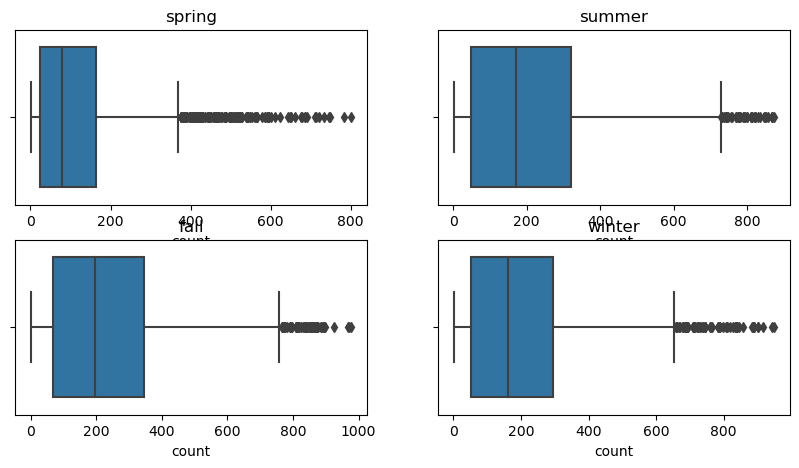

In [28]:
fig = plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.boxplot(data=spring,x='count' ).set_title("spring") #to see the average booking and outliers in spring season using box plot
plt.subplot(2,2,2)
sns.boxplot(data=summer,x='count' ).set_title("summer") #to see the average booking and outliers in summer season using box plot
plt.subplot(2,2,3)
sns.boxplot(data=fall,x='count').set_title("fall") #to see the average booking and outliers in fall season using box plot
plt.subplot(2,2,4)
sns.boxplot(data=winter,x='count' ).set_title("winter") #to see the average booking and outliers in winter season using box plot

Text(0.5, 1.0, 'heavy rain')

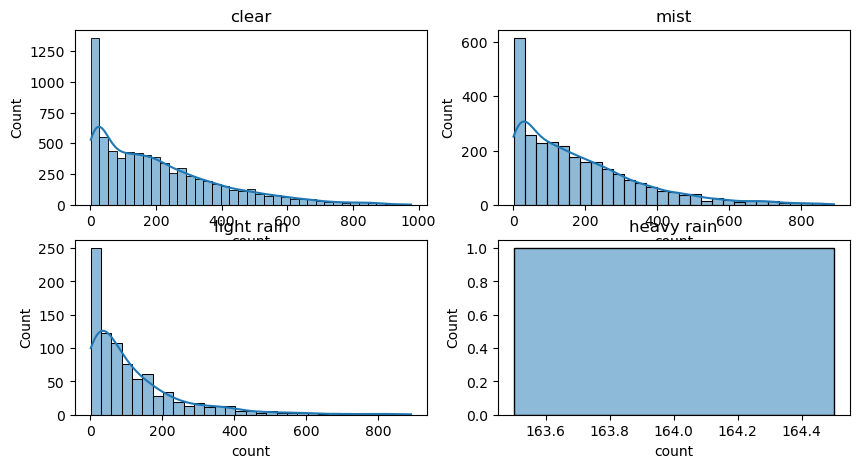

In [29]:
fig = plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.histplot(data=clear,x='count' , kde=True).set_title("clear") #to check visually type of distribution of bookings in clear weather using kde plot
plt.subplot(2,2,2)
sns.histplot(data=mist,x='count' , kde=True).set_title("mist") #to check visually type of distribution of bookings in cloudy weather using kde plot
plt.subplot(2,2,3)
sns.histplot(data=light_rain,x='count' , kde=True).set_title("light rain") #to check visually type of distribution of bookings during light rain weather using kde plot
plt.subplot(2,2,4)
sns.histplot(data=heavy_rain,x='count' , kde=True).set_title("heavy rain") #to check visually type of distribution of bookings in heavy rain weather using kde plot

Text(0.5, 1.0, 'heavy rain')

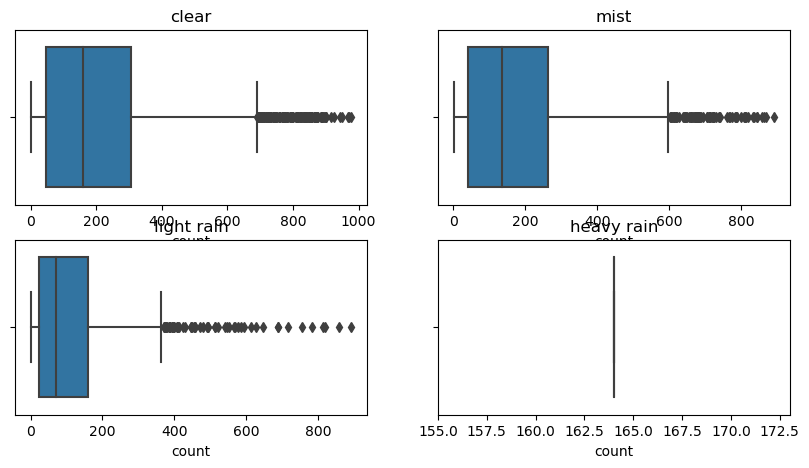

In [30]:
fig = plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.boxplot(data=clear,x='count').set_title("clear")
plt.subplot(2,2,2)
sns.boxplot(data=mist,x='count').set_title("mist")
plt.subplot(2,2,3)
sns.boxplot(data=light_rain,x='count').set_title("light rain")
plt.subplot(2,2,4)
sns.boxplot(data=heavy_rain,x='count').set_title("heavy rain")

## Hypothesis Testing

In [31]:
#lets check wether there is an effect of working day on booking 
# lets assume H0 = "There is no effect of working day on number of bookings"
# and H1 = "There is an effect of working day on number of bookings"
# and lets assume aplha = 0.05%
# for checking this hypothesis we will use ttest because there are comparison of numerical value of two categories

In [32]:
from scipy.stats import ttest_ind

In [33]:
ttest_wkg, pval_wkg = ttest_ind(w_day['count'],nw_day['count'])
ttest_wkg, pval_wkg

(1.2096277376026694, 0.22644804226361348)

In [34]:
if pval_wkg > 0.05:
    print("We are failed to reject the Null Hypothesis H0")
else:
    print("Reject the Null Hypothesis")

We are failed to reject the Null Hypothesis H0


In [35]:
#lets check wether there is an effect of holiday on booking 
# lets assume H0 = "There is no effect of holiday on number of bookings"
# and H1 = "There is an effect of holiday on number of bookings"
# and lets assume aplha = 0.05%
# for checking this hypothesis again we will use ttest because there are comparison of numerical value of two categories

In [36]:
ttest_hl, pval_hl = ttest_ind(holiday['count'],not_holiday['count'])
ttest_hl, pval_hl

(-0.5626388963477119, 0.5736923883271103)

In [37]:
if pval_hl > 0.05:
    print("We are failed to reject the Null Hypothesis H0")
else:
    print("Reject the Null Hypothesis")

We are failed to reject the Null Hypothesis H0


In [38]:
#lets check wether there is an effect of weather on booking 
# lets assume H0 = "There is no effect of weather on number of bookings"
# and H1 = "There is an effect of weather on number of bookings"
# and lets assume aplha = 0.05%
# for checking this hypothesis we will first check the type of distribution wether it is normal distributed or not
# for this we will use qqplot

In [39]:
from scipy.stats import f_oneway 
from statsmodels.graphics.gofplots import qqplot

[]

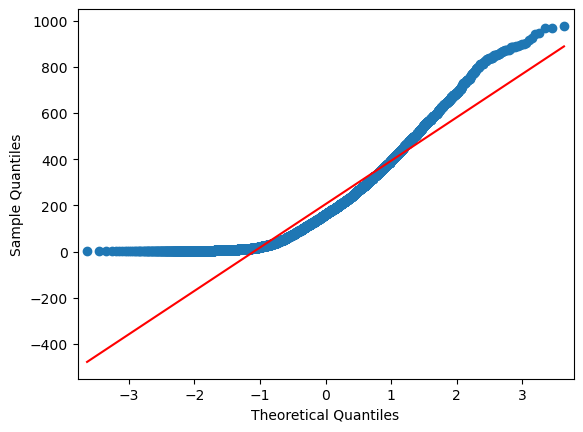

In [40]:
qqplot(clear['count'], line="s")
plt.plot()

[]

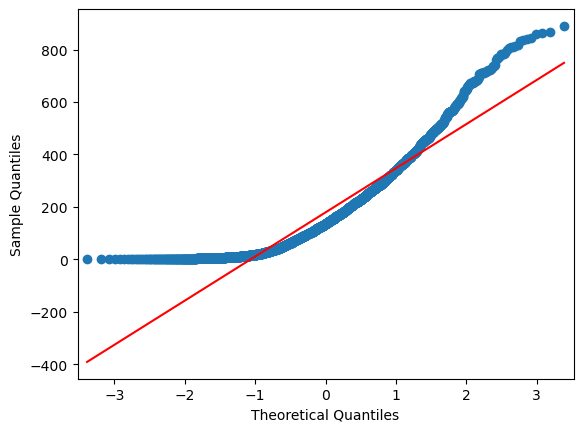

In [41]:
qqplot(mist['count'], line="s")
plt.plot()

[]

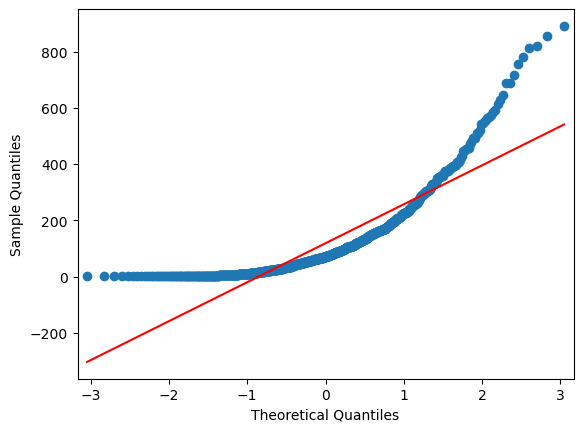

In [42]:
qqplot(light_rain['count'], line="s")
plt.plot()

[]

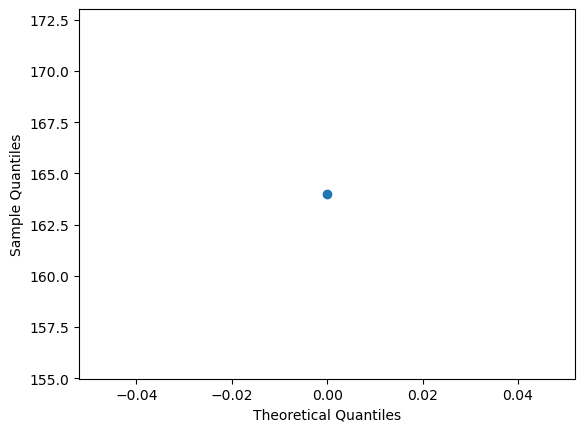

In [43]:
qqplot(heavy_rain['count'], line="s")
plt.plot()

In [44]:
f_test_weather, p_val_weather = f_oneway(clear['count'],mist['count'],light_rain['count'])
f_test_weather, p_val_weather 

(98.28356881946706, 4.976448509904196e-43)

In [45]:
if p_val_weather > 0.05:
    print("We are failed to reject the Null Hypothesis H0")
else:
    print("Reject the Null Hypothesis")

Reject the Null Hypothesis


In [46]:
from scipy.stats import kruskal

In [47]:
k_test_weather,pval_k_weather = kruskal(clear['count'],mist['count'],light_rain['count'])

In [48]:
if pval_k_weather > 0.05:
    print("We are failed to reject the Null Hypothesis H0")
else:
    print("Reject the Null Hypothesis")

Reject the Null Hypothesis


In [49]:
#lets check wether there is an effect of season on booking 
# lets assume H0 = "There is no effect of season on number of bookings"
# and H1 = "There is an effect of season on number of bookings"
# and lets assume aplha = 0.05%
# for checking this hypothesis we will first check the type of distribution wether it is normal distributed or not
# for this we will use this time shapiro

In [50]:
# As shapiro gives the pvalue lets assume that alpha = 0.05
# H0 = "Data is Gaussian"
# H1 = "Data is not Gaussian"
from scipy.stats import shapiro

In [51]:
s_test_spring, pval_s_spring = shapiro(spring['count'])
s_test_spring, pval_s_spring

(0.8087388873100281, 0.0)

In [52]:
if pval_s_spring > 0.05:
    print("We are failed to reject the Null Hypothesis H0")
else:
    print("Reject the Null Hypothesis")

Reject the Null Hypothesis


In [53]:
s_test_summer, pval_s_summer = shapiro(summer['count'])
s_test_summer, pval_s_summer

(0.900481641292572, 6.039093315091269e-39)

In [54]:
if pval_s_summer > 0.05:
    print("We are failed to reject the Null Hypothesis H0")
else:
    print("Reject the Null Hypothesis")

Reject the Null Hypothesis


In [55]:
s_test_fall, pval_s_fall = shapiro(fall['count'])
s_test_fall, pval_s_fall 

(0.9148160815238953, 1.043458045587339e-36)

In [56]:
if pval_s_fall > 0.05:
    print("We are failed to reject the Null Hypothesis H0")
else:
    print("Reject the Null Hypothesis")

Reject the Null Hypothesis


In [57]:
s_test_winter, pval_s_winter = shapiro(winter['count'])
s_test_winter, pval_s_winter

(0.8954644799232483, 1.1301682309549298e-39)

In [58]:
if pval_s_winter > 0.05:
    print("We are failed to reject the Null Hypothesis H0")
else:
    print("Reject the Null Hypothesis")

Reject the Null Hypothesis


In [59]:
f_test, pval_a_season = f_oneway(spring['count'],summer['count'],fall['count'],winter['count'])
f_test, pval_a_season

(236.94671081032106, 6.164843386499654e-149)

In [60]:
if pval_a_season > 0.05:
    print("We are failed to reject the Null Hypothesis H0")
else:
    print("Reject the Null Hypothesis")

Reject the Null Hypothesis


In [61]:
kruskal_test, pval_k_season = kruskal(spring['count'],summer['count'],fall['count'],winter['count'])
kruskal_test, pval_k_season

(699.6668548181988, 2.479008372608633e-151)

In [62]:
if pval_k_season > 0.05:
    print("We are failed to reject the Null Hypothesis H0")
else:
    print("Reject the Null Hypothesis")

Reject the Null Hypothesis


In [63]:
#lets check if weather is depedent on season
# lets assume H0 = "There is no relationship between weather and season"
# and H1 = "There is a relationship between weather and season"
# for this we have to go for chi2_contingency test

In [64]:
weather_season =  pd.crosstab(df[df['weather']!=4]['weather'],df['season'])
weather_season

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225


In [65]:
df[df['weather']!=4] #dropping the weather when it is heavy rain because it is happend only once in two year and might affect our test as well.

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012-12-19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012-12-19
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012-12-19
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012-12-19


In [66]:
from scipy.stats import chi2_contingency

In [67]:
chitest_val, p_val_chi, df, exp_freq = chi2_contingency(weather_season)
chitest_val, p_val_chi, df, exp_freq

(46.101457310732485,
 2.8260014509929403e-08,
 6,
 array([[1774.04869086, 1805.76352779, 1805.76352779, 1806.42425356],
        [ 699.06201194,  711.55920992,  711.55920992,  711.81956821],
        [ 211.8892972 ,  215.67726229,  215.67726229,  215.75617823]]))

In [68]:
if p_val_chi > 0.05:
    print("We are failed to reject the Null Hypothesis H0")
else:
    print("Reject the Null Hypothesis")

Reject the Null Hypothesis


# Recomendation